In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as prep
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
data = pd.read_csv('C:\\Users\\shigri\\Nust Practical\\files\\AI-Data.csv')


In [79]:
data.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [80]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


<AxesSubplot:>

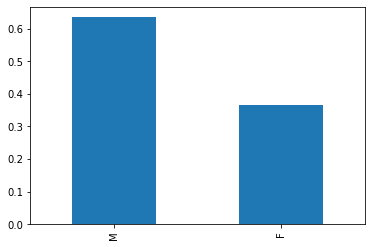

In [11]:
print('Percentage',data.gender.value_counts(normalize=True))
data.gender.value_counts(normalize=True).plot(kind='bar')

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
Lybia          0.012500
Iran           0.012500
USA            0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<AxesSubplot:>

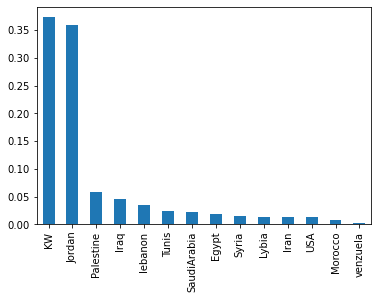

In [12]:
print('Percentage',data.NationalITy.value_counts(normalize=True))
data.NationalITy.value_counts(normalize=True).plot(kind='bar')

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Lybia          0.012500
Iran           0.012500
Syria          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<AxesSubplot:>

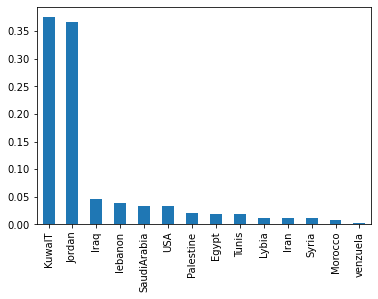

In [13]:

print('Percentage',data.PlaceofBirth.value_counts(normalize=True))
data.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

Percentage MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


<AxesSubplot:>

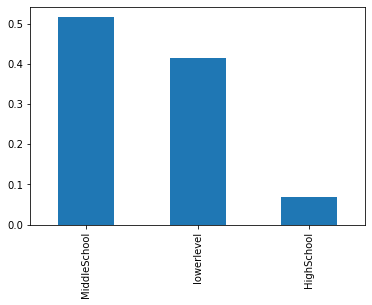

In [14]:
print('Percentage',data.StageID.value_counts(normalize=True))
data.StageID.value_counts(normalize=True).plot(kind='bar')

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<AxesSubplot:>

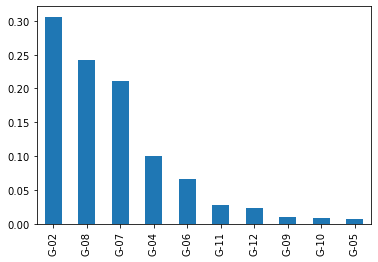

In [15]:
print('Percentage',data.GradeID.value_counts(normalize=True))
data.GradeID.value_counts(normalize=True).plot(kind='bar')

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<AxesSubplot:>

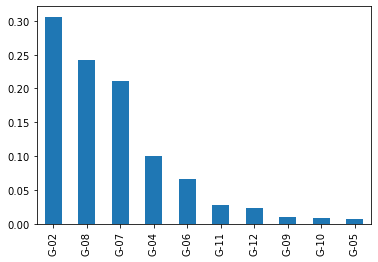

In [16]:
print('Percentage',data.GradeID.value_counts(normalize=True))
data.GradeID.value_counts(normalize=True).plot(kind='bar')


Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<AxesSubplot:>

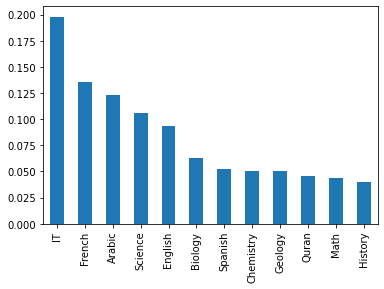

In [17]:
print('Percentage',data.Topic.value_counts(normalize=True))
data.Topic.value_counts(normalize=True).plot(kind='bar')


Percentage F    0.510417
S    0.489583
Name: Semester, dtype: float64


<AxesSubplot:>

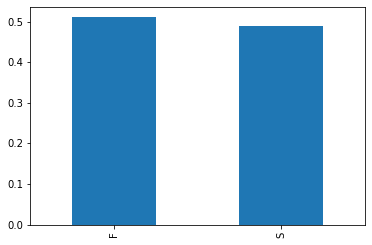

In [18]:
print('Percentage',data.Semester.value_counts(normalize=True))
data.Semester.value_counts(normalize=True).plot(kind='bar')


Percentage Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


<AxesSubplot:>

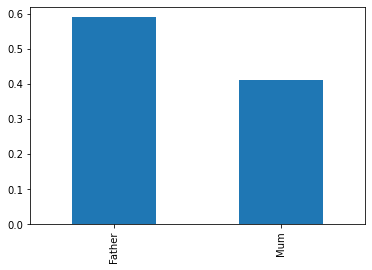

In [19]:
print('Percentage',data.Relation.value_counts(normalize=True))
data.Relation.value_counts(normalize=True).plot(kind='bar')


Percentage 10    0.064583
70    0.064583
80    0.058333
50    0.035417
72    0.035417
        ...   
28    0.002083
66    0.002083
67    0.002083
83    0.002083
86    0.002083
Name: raisedhands, Length: 82, dtype: float64


<AxesSubplot:>

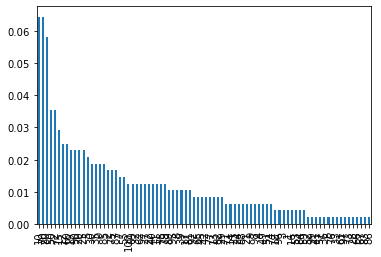

In [20]:
print('Percentage',data.raisedhands.value_counts(normalize=True))
data.raisedhands.value_counts(normalize=True).plot(kind='bar')


Percentage 80    0.060417
90    0.060417
82    0.033333
88    0.027083
12    0.027083
        ...   
54    0.002083
36    0.002083
16    0.002083
18    0.002083
48    0.002083
Name: VisITedResources, Length: 89, dtype: float64


<AxesSubplot:ylabel='VisITedResources'>

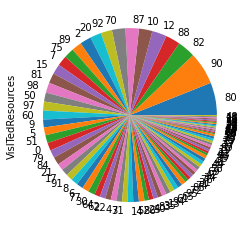

In [21]:
print('Percentage',data.VisITedResources.value_counts(normalize=True))
data.VisITedResources.value_counts(normalize=True).plot(kind='pie')


Percentage Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


<AxesSubplot:>

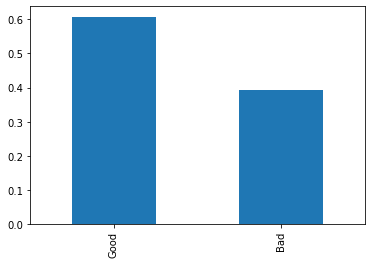

In [22]:
print('Percentage',data.ParentschoolSatisfaction.value_counts(normalize=True))
data.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')


Percentage Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


<AxesSubplot:>

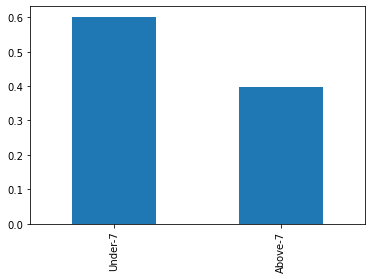

In [23]:
print('Percentage',data.StudentAbsenceDays.value_counts(normalize=True))
data.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar')


Percentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<AxesSubplot:>

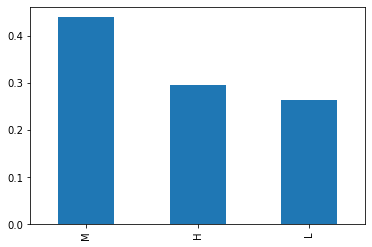

In [24]:
print('Percentage',data.Class.value_counts(normalize=True))
data.Class.value_counts(normalize=True).plot(kind='bar')


Percentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

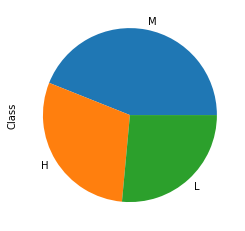

In [25]:
print('Percentage',data.Class.value_counts(normalize=True))
data.Class.value_counts(normalize=True).plot(kind='pie')


<Figure size 720x432 with 0 Axes>

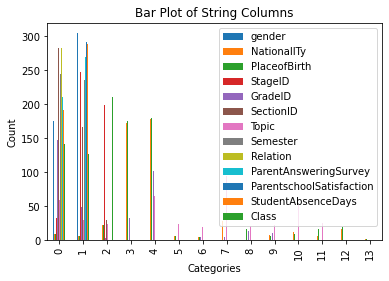

In [69]:
string_columns = data.select_dtypes(include=['int'])
string_columns
column_counts = string_columns.apply(pd.Series.value_counts)

plt.figure(figsize=(10, 6))
column_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of String Columns')
plt.legend(loc='upper right')
plt.show()

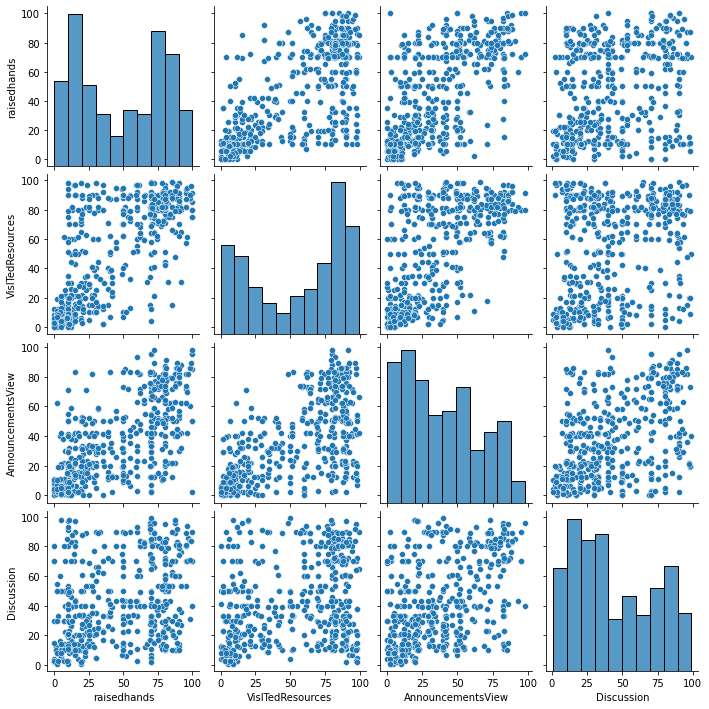

In [27]:
sns.pairplot(data)

In [89]:
for column in data.columns:
    if data[column].dtype == type(object):
        le = prep.LabelEncoder()
        data[column] = le.fit_transform(data[column])
X=data.drop('Class', axis=1)
y=data['Class']


0      2
1      2
2      1
3      1
4      2
      ..
475    1
476    2
477    2
478    1
479    1
Name: Class, Length: 480, dtype: int32

In [90]:
data


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0,1


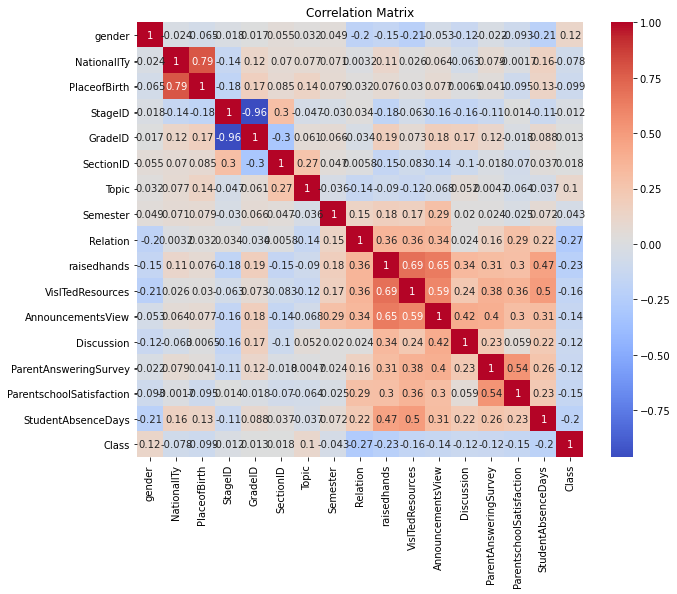

In [29]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


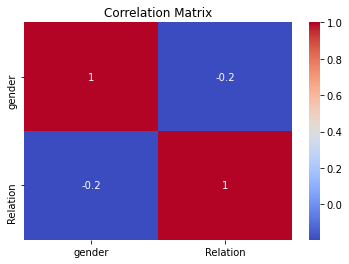

In [30]:
x=X[['gender','Relation']]
correlation_matrix = x.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 16)
(96, 16)
(384,)
(96,)


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

E:\installed program\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
print(model.intercept_)
print(model.coef_)

[-0.77861742  0.63352937  0.14508806]
[[-1.01047514 -0.07212769  0.13570268 -1.47664764 -0.44800171 -0.05797598
  -0.05400451 -0.20095212  0.63934317  0.03493871  0.0191408   0.01653802
   0.01303723  0.48095615  0.32522133  0.86657759]
 [ 0.8781837   0.16231665 -0.18681441  1.34294192  0.39477999 -0.11841176
   0.02804141  0.57283748  0.06613842 -0.03995597 -0.02639592 -0.03308898
  -0.00819672 -0.59672791 -0.26013147 -1.26295595]
 [ 0.13229144 -0.09018896  0.05111173  0.13370572  0.05322172  0.17638774
   0.0259631  -0.37188537 -0.7054816   0.00501726  0.00725512  0.01655096
  -0.00484051  0.11577176 -0.06508986  0.39637836]]


In [47]:
Y_pred = model.predict(X_test)
print(X_test[:5])
print(Y_test[:5])

     gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
293       0            7             7        2        1          0     10   
283       0            3             3        1        3          0      3   
34        1            4             4        1        4          1     10   
380       0            3             3        2        0          1      0   
430       1            3             8        1        5          0      5   

     Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
293         1         1           49                55                 68   
283         1         1           78                76                 77   
34          0         0           12                11                  8   
380         0         0           11                20                 20   
430         0         0           69                78                 22   

     Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \


In [48]:
#to check accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
a=accuracy_score(y_test, y_pred)
print(a*100)


68.75


In [49]:
#Decesion Tree classifier and its accuracy 
from sklearn.tree import DecisionTreeClassifier
gnb = DecisionTreeClassifier()
gnb=gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred, normalize=False))



0.6770833333333334
65


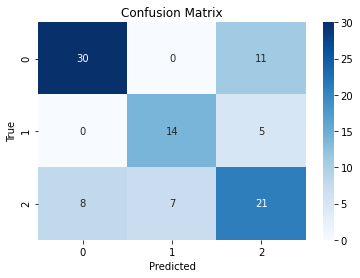

In [50]:
#Concussion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
labels = np.unique(y) # Get unique labels from your target variable
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [51]:
#F1 score

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
f1


0.6782787122131668

In [52]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1


0.6786621799317958

In [53]:
#SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [54]:
y_pred = clf.predict(X_test)

# svm accuracy


In [55]:
#SVM accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 63.541666666666664


In [56]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [57]:
#Xgboots accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 80.20833333333334


In [62]:
import xgboost as xgb
clf = xgb.XGBClassifier(booster='gblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 76.04166666666666
